# Auto mpg
## Improve a neural network with regularisation

In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

In [2]:
# Import data
df = pd.read_csv('../input/auto-mpg-dataset/auto-mpg.csv', delimiter = ",")

# Drop missing entries
df = df.replace("?", np.nan)
df = df.dropna()

In [3]:
# Explore the size of the data set
df.shape 

(392, 9)

In [4]:
# Explore type of data and feature names
#df.head() or 
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
134,16.0,6,258.0,110,3632,18.0,74,1,amc matador
225,17.5,6,250.0,110,3520,16.4,77,1,chevrolet concours
150,26.0,4,108.0,93,2391,15.5,74,3,subaru
14,24.0,4,113.0,95,2372,15.0,70,3,toyota corona mark ii
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
260,18.6,6,225.0,110,3620,18.7,78,1,dodge aspen
222,17.0,8,260.0,110,4060,19.0,77,1,oldsmobile cutlass supreme
237,30.5,4,98.0,63,2051,17.0,77,1,chevrolet chevette
165,20.0,8,262.0,110,3221,13.5,75,1,chevrolet monza 2+2
337,32.4,4,107.0,72,2290,17.0,80,3,honda accord


In [5]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
duplicate_rows_df=df[df.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.932994,-0.543800,-0.369855,-0.614535
weight,-0.832244,0.897527,0.932994,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.585005,0.212746,0.181528,1.000000


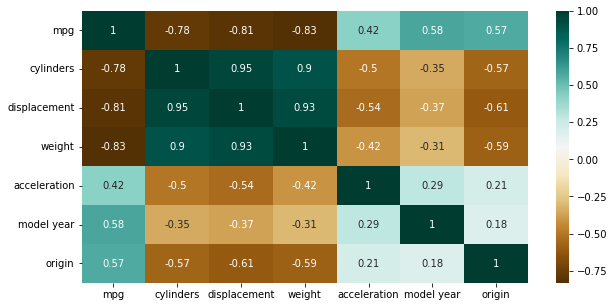

In [7]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c

In [8]:
plt.show()

In [9]:
# Split data into features (X) and response (y)
# Predict mpg vs other variables (excluding car name)
X = df.iloc[:, 1:8] 
y = df.iloc[:, 0]

In [10]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [11]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [12]:
# Put the response y into an array
y = np.ravel(y)

In [13]:
# Split the data into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
# Scale data
scaler = StandardScaler()  

# Fit using only the training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train) 

# Apply the same transformation to test data
X_test = scaler.transform(X_test)

### Before regularisation

Use the `solver=lbfgs`, `activation="tanh"` and `hidden_layer_sizes=(5)` to train the network.

In [15]:
# Fit and check MSE before regularisation

reg = MLPRegressor(max_iter=100000, hidden_layer_sizes=(5), activation="tanh", solver="lbfgs",  
                    random_state=1) 
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# MSE before regularisation
mean_squared_error(y_pred, y_test)


9.116897986176085

### Regularisation
Train the model using the list of potential alpha values in `reg_par`, and determine the validation score as you learnt in Unit 2.

In [16]:
# Find regularisation parameter
reg_par = [np.e**n for n in np.arange(-3,5,1)] 

# Optimise neural network with regularisation
validation_scores = {}
print(" alpha  |  Sq.Error") 

for param in reg_par:
    reg = MLPRegressor(max_iter=100000, hidden_layer_sizes=(5), activation="tanh", solver="lbfgs",
                       alpha=param, random_state=1)
    score = cross_val_score(estimator=reg, X=X_train, y=y_train, 
                            cv=3, scoring="neg_mean_squared_error")
    validation_scores[param] = -score.mean()
    print("%0.5f |  %0.6f" % (param, -score.mean()))   


 alpha  |  Sq.Error
0.04979 |  11.000804
0.13534 |  11.129626
0.36788 |  8.721438
1.00000 |  8.282562
2.71828 |  8.764460
7.38906 |  7.873945
20.08554 |  8.021878
54.59815 |  10.917239


Text(0, 0.5, 'Mean Sq Error')

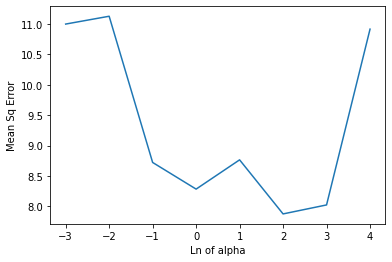

In [17]:
# Plot the error function    
plt.plot([np.log(i) for i in validation_scores.keys()], list(validation_scores.values()))
plt.xlabel("Ln of alpha")
plt.ylabel("Mean Sq Error")


Print the lowest cross-validation error and the value to use for the `alpha` parameter in the following cell.

In [18]:
# Check errors
print("The lowest cross validation error is %f" % min(validation_scores.values()))        
print("This corresponds to regularisation parameter e**%s" % 
      ([np.log(name) for name, score in validation_scores.items()   
                         if score==min(validation_scores.values())][0]))

The lowest cross validation error is 7.873945
This corresponds to regularisation parameter e**2.0


 ### After regularisation

In [19]:
# Fit data with the best parameter
reg = MLPRegressor(max_iter=100000, hidden_layer_sizes=(5), activation="tanh", solver="lbfgs",
                   alpha=np.e**(2), random_state=1)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# MSE final
mean_squared_error(y_pred, y_test)

8.369257462600652

### Steps for setting up a response function
1. Find the minimum and maximum weight values
2. Set up a list of moving resultants
3. Predict using the above two sets of values
4. Plot miles per gallon against car weight

### Response function after regularisation

In [20]:
# Draw a response function

# Prepare data for graph
# Copy dataframe so as not to change original, and obtain medians
X_design = X.copy()
X_design_vec = pd.DataFrame(X_design.median()).transpose()

# View X_design_vec, which should contain the median of each respective column
X_design_vec.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,4.0,151.0,93.5,2803.5,15.5,76.0,1.0


1613 5140


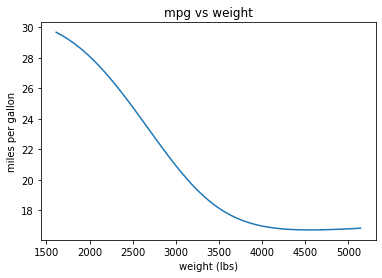

In [21]:
# Obtain the min and max of the weight variable and set up a sequence
min_res = min(X["weight"])
max_res = max(X["weight"])
print(min_res, max_res)
seq = np.linspace(start=min_res, stop=max_res, num=50)

# Set up a list of moving resultants

to_predict = []
for result in seq:
    X_design_vec.loc[0, "weight"] = result
    to_predict.append(X_design_vec.copy())

# Convert back to dataframe
to_predict = pd.concat(to_predict)

# Scale and predict
to_predict = scaler.transform(to_predict)
predictions = reg.predict(to_predict)

# Plot 
plt.plot(seq,predictions)
plt.xlabel("weight (lbs)")
plt.ylabel("miles per gallon")
plt.title("mpg vs weight")
plt.show()

